In [1]:
import pandas as pd
import numpy as np

In [219]:
Bank_Data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [220]:
Bank_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [221]:
Bank_Data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [222]:
Bank_Data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [223]:
drp_cols = ['ID', 'ZIP Code']

In [224]:
MyData =Bank_Data.drop(columns=drp_cols,axis =1,inplace=True )

In [225]:
Bank_Data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [18]:
Bank_Data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [21]:
x  = Bank_Data.iloc[:,:6]

In [22]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education
0,25,1,49,4,1.6,1
1,45,19,34,3,1.5,1
2,39,15,11,1,1.0,1
3,35,9,100,1,2.7,2
4,35,8,45,4,1.0,2


In [28]:
y = Bank_Data.iloc[:,7:8]

In [29]:
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [272]:
from sklearn.model_selection import train_test_split

In [282]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20,random_state =2)

In [283]:
x_train.shape

(4000, 6)

In [284]:
y_train.shape

(4000, 1)

In [285]:
x_test.shape

(1000, 6)

In [286]:
y_test.shape

(1000, 1)

In [240]:
from sklearn import tree

In [307]:
Bank_Model = tree.DecisionTreeClassifier(max_depth=8)

In [308]:
x_train.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education'], dtype='object')

In [309]:
predictors =pd.DataFrame([x_train.Age, x_train.Experience, x_train.Income,x_train.Family,x_train.CCAvg,x_train.Education]).T

In [310]:
predictors

,Age,Experience,Income,Family,CCAvg,Education
868,40.0,15.0,161.0,2.0,3.3,1.0
936,62.0,32.0,19.0,1.0,1.5,3.0
4034,35.0,11.0,82.0,2.0,1.7,2.0
1923,45.0,19.0,22.0,1.0,0.2,1.0
3330,34.0,9.0,32.0,4.0,1.1,3.0
...,...,...,...,...,...,...
3335,35.0,10.0,118.0,2.0,7.8,1.0
1099,30.0,6.0,52.0,3.0,0.7,2.0
2514,41.0,16.0,25.0,2.0,0.1,2.0
3606,43.0,18.0,9.0,2.0,0.0,3.0


In [311]:
Bank_Model.fit(X = predictors, y = y_train['Personal Loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [312]:
Bank_Model.score(X = predictors, y = y_train['Personal Loan'])

0.997

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

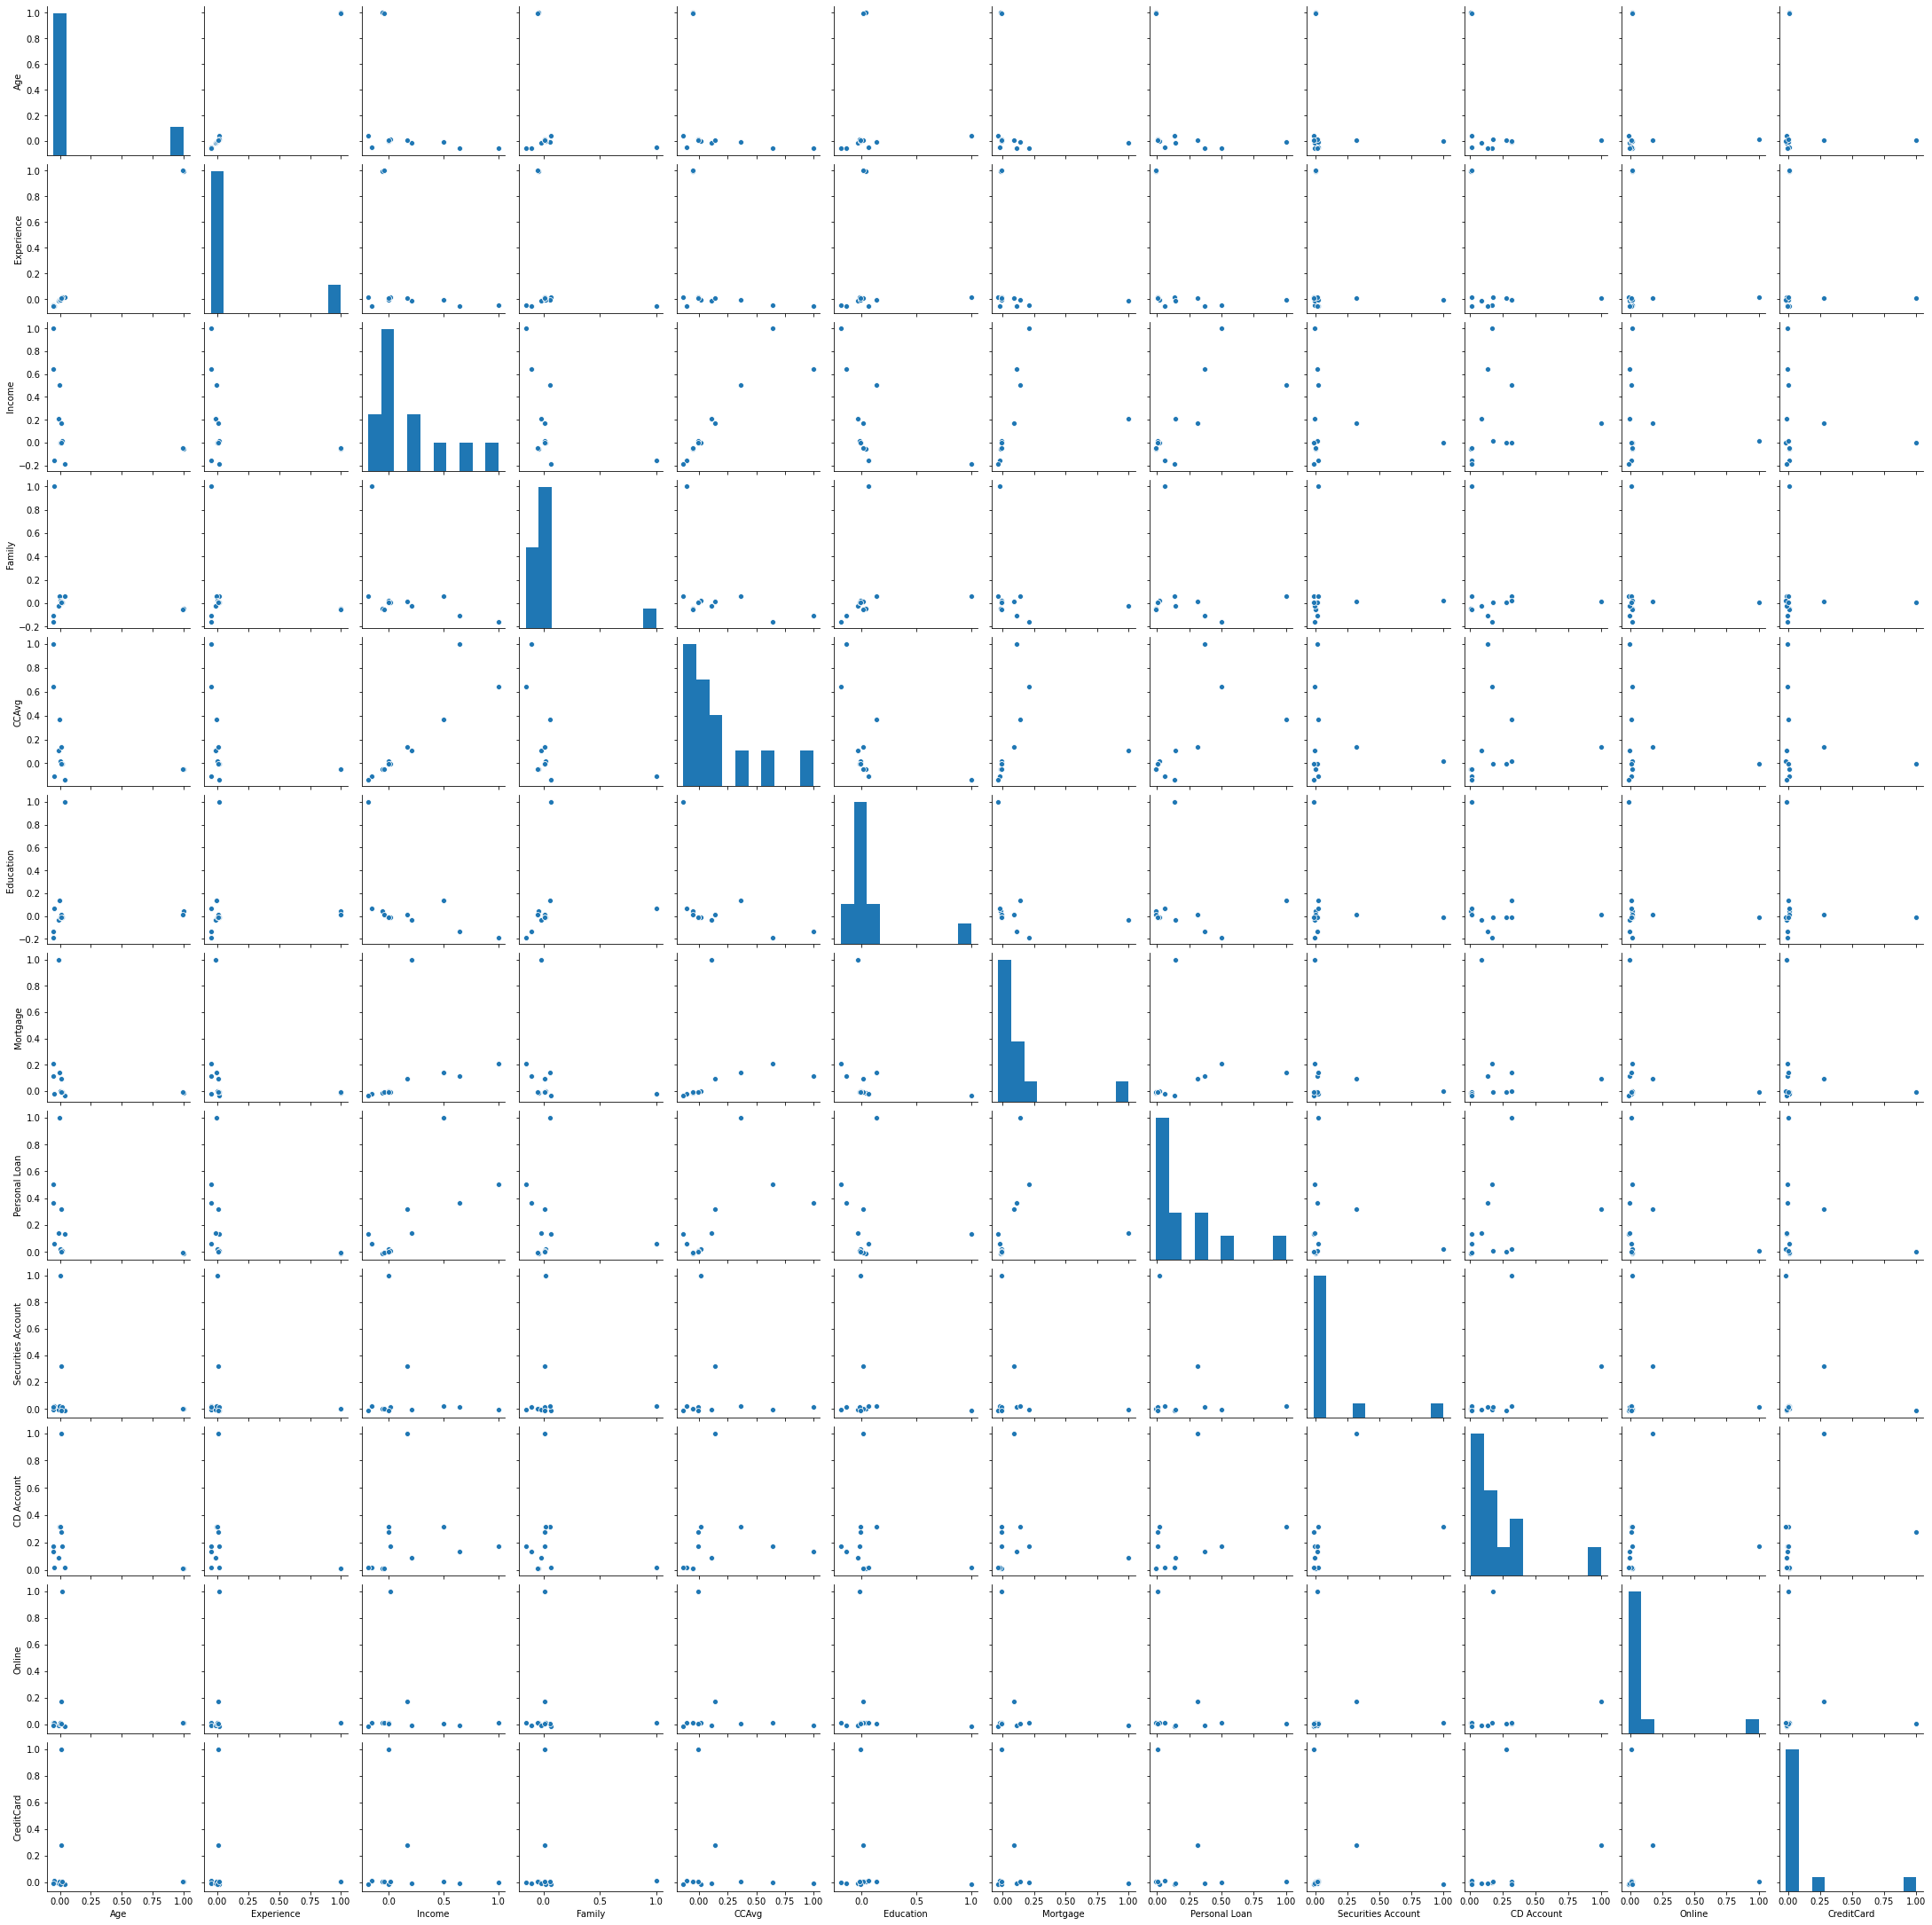

In [305]:
sns.pairplot(Bank_Data.corr())

<AxesSubplot:>

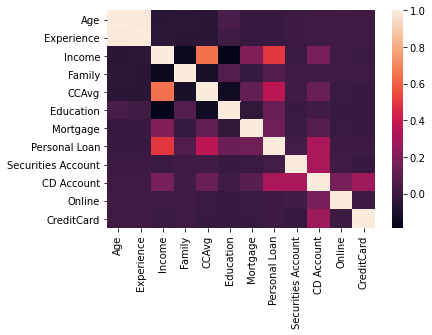

In [91]:
sns.heatmap(Bank_Data.corr())

In [314]:
predictors2 =pd.DataFrame([x_test.Age, x_test.Experience, x_test.Income,x_test.Family,x_test.CCAvg,x_test.Education]).T

In [315]:
predictors2

,Age,Experience,Income,Family,CCAvg,Education
3566,57.0,33.0,80.0,2.0,2.8,1.0
4252,54.0,29.0,81.0,1.0,0.1,3.0
1918,39.0,9.0,118.0,2.0,6.0,3.0
4111,43.0,17.0,21.0,3.0,1.5,1.0
1471,52.0,26.0,180.0,1.0,1.0,1.0
...,...,...,...,...,...,...
2987,33.0,7.0,39.0,2.0,2.0,3.0
3564,33.0,7.0,29.0,1.0,0.6,3.0
1447,52.0,28.0,145.0,2.0,6.8,1.0
742,32.0,6.0,81.0,1.0,2.5,1.0


In [316]:
Model_Pred = Bank_Model.predict(X = predictors2)

In [317]:
Predicted_Y = pd.DataFrame([Model_Pred]).T

In [318]:
Predicted_Y

,0
0,0
1,0
2,1
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [319]:
y_test= y_test.reset_index()
y_test

,index,Personal Loan
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


In [320]:
y_test.drop(columns=['index'],axis=1,inplace=True)
y_test

,Personal Loan
0,0
1,0
2,1
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [321]:
Results = pd.DataFrame({'y_test': y_test['Personal Loan'],'Predicted_Y': Predicted_Y[0]})

In [322]:
Results

,y_test,Predicted_Y
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [323]:
Results['Dif'] = Results['y_test'] - Results['Predicted_Y']

In [324]:
Results[Results['Dif']==1]

,y_test,Predicted_Y,Dif
104,1,0,1
199,1,0,1
202,1,0,1
412,1,0,1
533,1,0,1
548,1,0,1
614,1,0,1
653,1,0,1
664,1,0,1
702,1,0,1


In [373]:
Results2[Results2['Dif']==1].count()

y_test         9
Predicted_Y    9
Dif            9
dtype: int64

In [325]:
with open("DTree_Bank.dot", "w") as f:
    f = tree.export_graphviz(Bank_Model,feature_names=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education'],out_file=f)

In [326]:
from sklearn.ensemble import RandomForestClassifier

In [327]:
rf_Bank = RandomForestClassifier(n_estimators=1000,oob_score=True,max_features=2)

In [328]:
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education']

In [329]:
rf_Bank.fit(X=x_train[features],y=y_train['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [333]:
print(rf_Bank.oob_score_)

0.98775


In [334]:
for features,imp in zip(features,rf_Bank.feature_importances_):
    print(features,imp)

Age 0.038013548568982466
Experience 0.03497408255060643
Income 0.4230441431720904
Family 0.1187624589510503
CCAvg 0.18196386288628322
Education 0.20324190387098726


In [336]:
x = Bank_Data[['CCAvg','Income','Education','Family']]

In [337]:
x.head()

,CCAvg,Income,Education,Family
0,1.6,49,1,4
1,1.5,34,1,3
2,1.0,11,1,1
3,2.7,100,2,1
4,1.0,45,2,4


In [338]:
y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [340]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20, random_state=2)

In [341]:
x_train.shape

(4000, 4)

In [342]:
y_train.shape

(4000, 1)

In [343]:
x_train.columns

Index(['CCAvg', 'Income', 'Education', 'Family'], dtype='object')

In [344]:
predictors =pd.DataFrame([x_train.CCAvg,x_train.Income,x_train.Education,x_train.Family]).T

In [347]:
predictors.head()

,CCAvg,Income,Education,Family
868,3.3,161.0,1.0,2.0
936,1.5,19.0,3.0,1.0
4034,1.7,82.0,2.0,2.0
1923,0.2,22.0,1.0,1.0
3330,1.1,32.0,3.0,4.0


In [348]:
Bank_Model.fit(X=predictors, y=y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [349]:
with open("AfterRF.dot", "w") as p:
    p = tree.export_graphviz(Bank_Model,feature_names=['CCAvg', 'Income', 'Education', 'Family'],out_file=p)

In [350]:
Bank_Model.score(X = predictors, y = y_train['Personal Loan'])

0.99625

In [352]:
y_Pred = Bank_Model.predict(X = x_test)

In [359]:
myPred = pd.DataFrame(np.array(y_Pred),columns=["RF_Predicted"])

In [360]:
myPred

,RF_Predicted
0,0
1,0
2,1
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [366]:
y_test= y_test.reset_index()
y_test.drop(columns=['level_0','index'],axis=1,inplace=True)
y_test

,Personal Loan
0,0
1,0
2,1
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [367]:
Results2 = pd.DataFrame({'y_test': y_test['Personal Loan'],'Predicted_Y': myPred['RF_Predicted']})

In [368]:
Results2

,y_test,Predicted_Y
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [369]:
Results2['Dif'] = Results2['y_test'] - Results2['Predicted_Y']

In [372]:
Results2[Results2['Dif']==1].count()

y_test         9
Predicted_Y    9
Dif            9
dtype: int64

<AxesSubplot:>

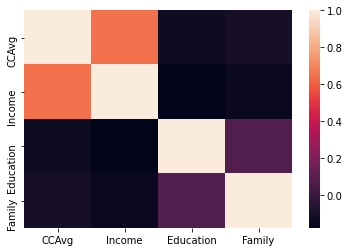

In [376]:
sns.heatmap(x_train.corr())

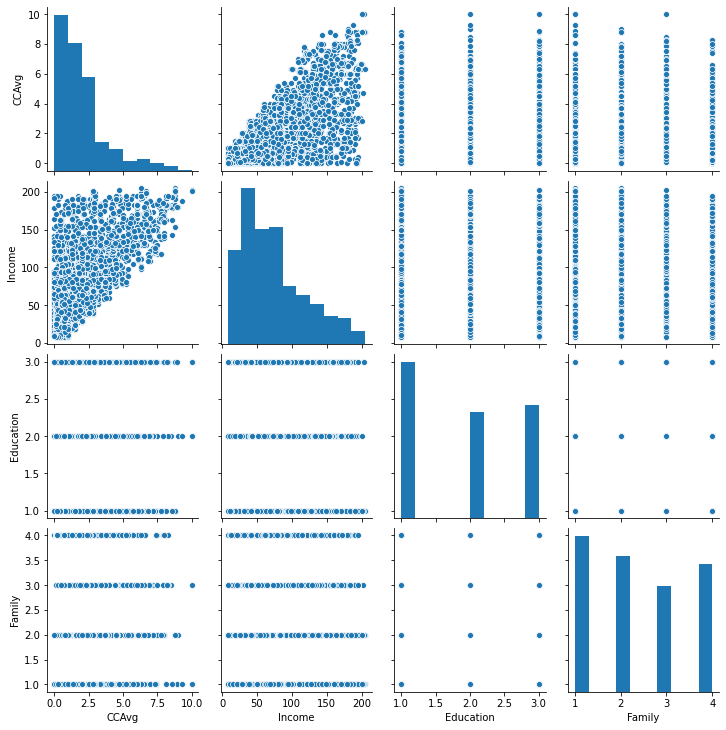

In [377]:
sns.pairplot(x_train)